## Imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Data Generation

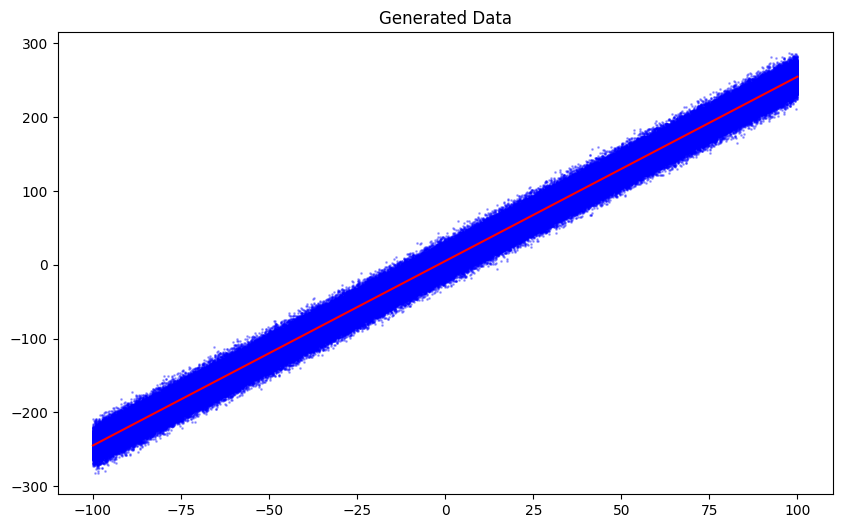

In [14]:
# declaring variables
m_true = 2.5
c = 5
n_samples = 1000000

# generating data
x = np.linspace(-100, 100, n_samples)
noise = np.random.normal(0, 10, n_samples)
y = m_true * x + c + noise

# plotting data
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', alpha=0.3, s=1)
plt.plot(x, m_true * x + c, color='red')
plt.title("Generated Data")
plt.show()

## Linear Search Implementation

Best m (Linear Search): 2.50, Time Taken: 2.30 seconds


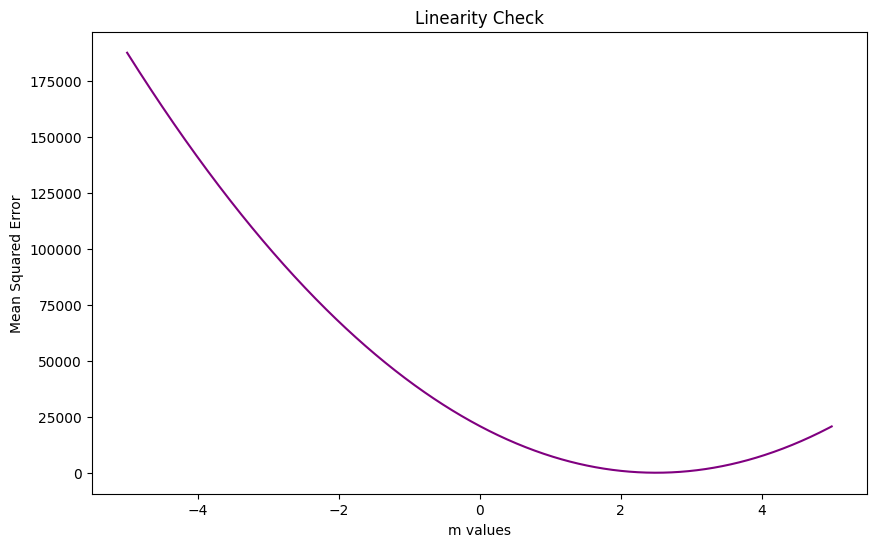

In [15]:
# linear search implementation
def linear_search(x, y, c, plot=False):
    """
    Linear search implementation to find the best m value

    Args:
        x (array): Input feature
        y (array): Target values
        c (float): Constant term
        plot (bool, optional): Whether to plot the results. Defaults to False.

    Returns:
        float: Best m value
        float: Time taken

    """

    # declaring search range
    m_search_range = np.arange(-5, 5, 0.01)
    errors = []

    start_time = time.time()

    for m_candidate in m_search_range:
        # making predictions
        y_pred = m_candidate * x + c

        # calculating mean squared error
        mse = np.mean((y - y_pred) ** 2)
        errors.append(mse)

    end_time = time.time()
    time_taken = end_time - start_time

    # finding best m
    best_m_index = np.argmin(errors)
    best_m = m_search_range[best_m_index]

    # plotting results
    if plot:
        plt.figure(figsize=(10,6))
        plt.plot(m_search_range, errors, color='purple')
        plt.xlabel('m values')
        plt.ylabel('Mean Squared Error')
        plt.title("Linearity Check")

        print(f'Best m (Linear Search): {best_m:.2f}, Time Taken: {time_taken:.2f} seconds')
        plt.show()

    # returning results
    return best_m, time_taken

# example usage
linear_m, linear_time = linear_search(x, y, c, plot=True)

## Gradient Descent Implementation

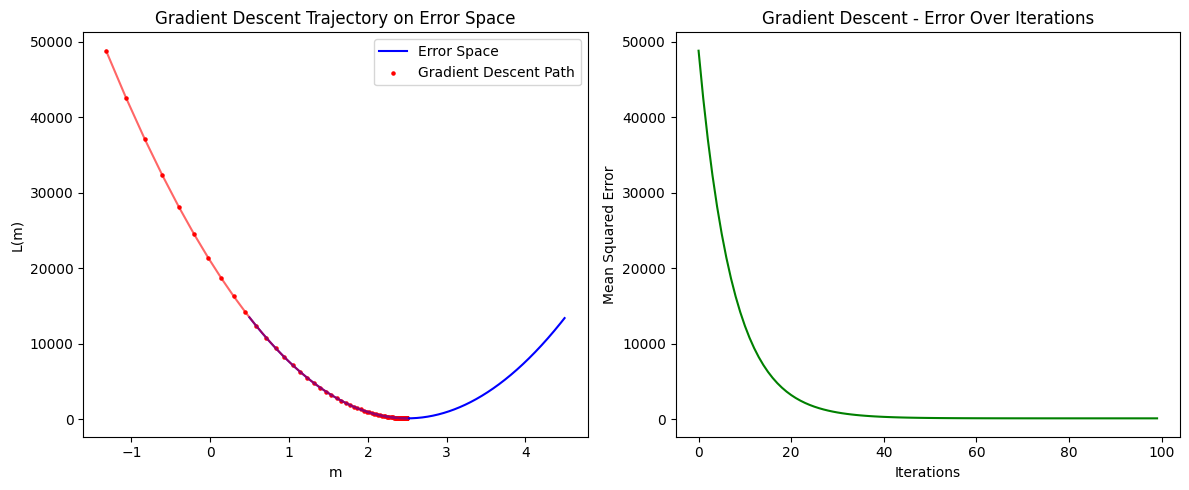

Final m (Gradient Descent): 2.50, Time Taken: 0.31 seconds


In [16]:
def gradient_descent(x, y, c, learning_rate=1e-5, n_iterations=100,plot=False):
    """
    Gradient descent implementation to find the best m value

    Args:
        x (array): Input feature
        y (array): Target values
        c (float): Constant term
        learning_rate (float, optional): Learning rate. Defaults to 1e-5.
        n_iterations (int, optional): Number of iterations. Defaults to 100.
        plot (bool, optional): Whether to plot the results. Defaults to False.

    Returns:
        float: Best m value
        float: Time taken
    """

    # initializing m with random value
    m_current = np.random.uniform(-5, 5)

    # ols_estimate = np.cov(x, y)[0,1] / np.var(x)
    # m_current = ols_estimate + np.random.uniform(-1, 1)  

    errors = []
    m_values = []

    start_time = time.time()

    for i in range(n_iterations):
        # making predictions
        y_pred = m_current * x + c

        # calculating mean squared error
        error = np.mean((y - y_pred) ** 2)
        errors.append(error)
        m_values.append(m_current)

        # updating m using gradient descent
        gradient = -2 * np.mean((y - y_pred) * x)
        m_current -= learning_rate * gradient

    end_time = time.time()
    time_taken = end_time - start_time

    # generating error space    
    m_val_lin = np.linspace(m_current - 2, m_current + 2, 1000)
    lin_error = [np.mean((y - (m * x + c)) ** 2) for m in m_val_lin]

    if plot:
        plt.figure(figsize=(12,5))

        # plotting results
        plt.subplot(1,2,1)
        plt.plot(m_val_lin, lin_error, label="Error Space", color="blue")
        plt.scatter(m_values, errors, color="red", s=5, label="Gradient Descent Path")
        plt.plot(m_values, errors, color="red", alpha=0.6)
        plt.xlabel("m")
        plt.ylabel("L(m)")
        plt.title("Gradient Descent Trajectory on Error Space")
        plt.legend()

        plt.subplot(1,2,2)
        plt.plot(range(n_iterations), errors, color='green')
        plt.xlabel('Iterations')
        plt.ylabel('Mean Squared Error')
        plt.title('Gradient Descent - Error Over Iterations')

        
        plt.tight_layout()
        plt.show()

        print(f'Final m (Gradient Descent): {m_current:.2f}, Time Taken: {time_taken:.2f} seconds')

    return m_current, time_taken

gradient_m, gradient_time = gradient_descent(x, y, c, plot=True)

## Comparison Between Linear Search and Gradient Descent

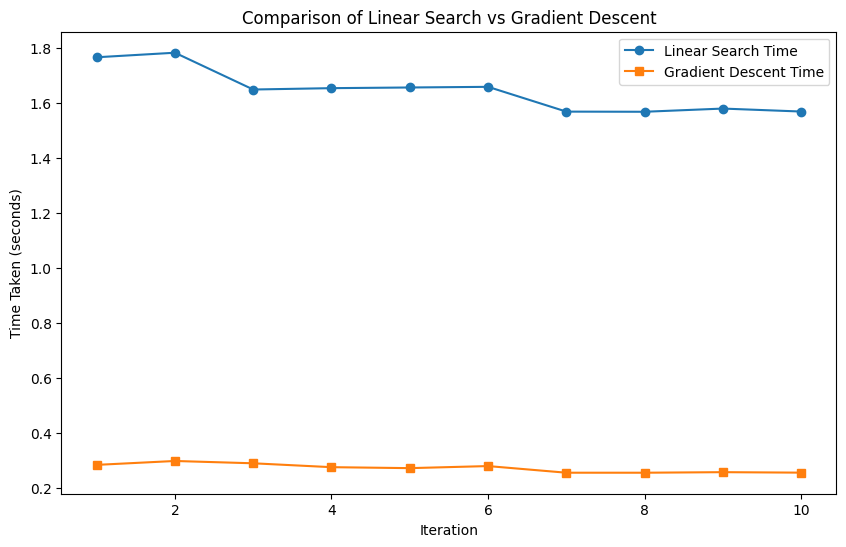

Average Time Taken (Linear Search): 1.64 seconds
Average Time Taken (Gradient Descent): 0.27 seconds


In [17]:
linear_times = []
gradient_times = []

for _ in range(10):
    _, lt = linear_search(x, y, c)
    _, gt = gradient_descent(x, y, c)
    linear_times.append(lt)
    gradient_times.append(gt)

# finding average time
avg_linear_time = np.mean(linear_times)
avg_gradient_time = np.mean(gradient_times)

# plotting results for comparison
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), linear_times, marker='o', label='Linear Search Time')
plt.plot(range(1, 11), gradient_times, marker='s', label='Gradient Descent Time')
plt.xlabel('Iteration')
plt.ylabel('Time Taken (seconds)')
plt.title('Comparison of Linear Search vs Gradient Descent')
plt.legend()
plt.show()

print(f"Average Time Taken (Linear Search): {avg_linear_time:.2f} seconds")
print(f"Average Time Taken (Gradient Descent): {avg_gradient_time:.2f} seconds")